# **UNZIPPING**

In [ ]:
# open the zip file in the notebook
!unzip /content/archive.zip

# **Imports**

In [ ]:
import cv2 
import numpy as np
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# **Reading the Images**

In [ ]:
img_matrix=[]
# to change the image into a vector 
for i in range (1,41):
  folder_name='s'+str(i)
  img_dir = "/content/"+folder_name # Enter Directory of all images   
  for j in range(1,11):
      img_path=img_dir+'/'+str(j)+'.pgm'
      img = cv2.imread(img_path,-1).flatten()
      img_matrix.append(img)
vector_x=np.array(img_matrix) # containt the images as vector
print(vector_x.shape)

(400, 10304)


In [ ]:
label_matrix=[]
for i in range(1,41):
  for j in range (1,11):
    label_matrix.append(str(i))
vector_y=np.array(label_matrix)

# **Splitting 50/50**

In [ ]:
Test_set_Data = []
Training_set_Data  =[]
Test_set_labels = []
Training_set_labels=[]

#  keep the odd rows for training and the even rows for testing
for i in range (400):
  if i%2==0:
    Test_set_Data.append(vector_x[i])
    Test_set_labels.append(vector_y[i])
  else : 
    Training_set_Data.append(vector_x[i])
    Training_set_labels.append(vector_y[i])


Test_set_Data=np.array(Test_set_Data)
Test_set_labels=np.array(Test_set_labels)

Training_set_Data=np.array(Training_set_Data)
Training_set_labels=np.array(Training_set_labels)

# **Eigen Values and Vectors**

In [ ]:
def Eigen_Generator (training_Data):
  Covariance_matrix=np.cov(training_Data,rowvar=False)
  Eigen_val, Eigen_vector=LA.eigh(Covariance_matrix)
  Eigen_val =Eigen_val [::-1]
  Eigen_vector = Eigen_vector [::-1]
  return Eigen_val,Eigen_vector

Eigen_val, Eigen_vector = Eigen_Generator(Training_set_Data)
total_Eigen_vals = np.sum(abs(Eigen_val))

# **Reduction of Dimensions**

In [ ]:
def Projecting_Data(alpha,Eigen_val,Eigen_vector,Training_set_Data,Test_set_Data):
  U_matrix=[]
  sum=0
  counter=1
  for i in range (len(Eigen_val)):
    sum=sum+Eigen_val[i]
    fr = sum/total_Eigen_vals
    if fr < alpha:
      counter = counter + 1
    else:
      break
  print("Reduced Dimensions:",counter)
  for i in range(counter):
    U_matrix.append(Eigen_vector[i])
  prj_train = np.dot(Training_set_Data,np.array(U_matrix).transpose())
  prj_test  = np.dot(Test_set_Data,np.array(U_matrix).transpose())
  return prj_train,prj_test

# **Projecting Data**

In [ ]:
prj_train_95,prj_test_95 = Projecting_Data(0.95,Eigen_val,Eigen_vector,Training_set_Data,Test_set_Data)
prj_train_90,prj_test_90 = Projecting_Data(0.9,Eigen_val,Eigen_vector,Training_set_Data,Test_set_Data)
prj_train_85,prj_test_85 = Projecting_Data(0.85,Eigen_val,Eigen_vector,Training_set_Data,Test_set_Data)
prj_train_80,prj_test_80 = Projecting_Data(0.8,Eigen_val,Eigen_vector,Training_set_Data,Test_set_Data)

Reduced Dimensions: 116
Reduced Dimensions: 77
Reduced Dimensions: 53
Reduced Dimensions: 37


# **KNN Classifier**

In [ ]:
def Knn_Classifier_model(k,prj_train,Training_set_labels,prj_test,Test_set_labels,alpha):
  model = KNeighborsClassifier(n_neighbors=k)
  FitModel = model.fit(prj_train, Training_set_labels)
  predictions = model.predict(prj_test)
  accuracy = accuracy_score(Test_set_labels, predictions)
  print("For alpha =",alpha, "and k =",k, "Accuracy =",accuracy*100)
  return accuracy

Accuracy_80_50_50=[]
Accuracy_85_50_50=[]
Accuracy_90_50_50=[]
Accuracy_95_50_50=[]

Accuracy_95_50_50.append(Knn_Classifier_model(1,prj_train_95,Training_set_labels,prj_test_95,Test_set_labels,0.95))
Accuracy_95_50_50.append(Knn_Classifier_model(3,prj_train_95,Training_set_labels,prj_test_95,Test_set_labels,0.95))
Accuracy_95_50_50.append(Knn_Classifier_model(5,prj_train_95,Training_set_labels,prj_test_95,Test_set_labels,0.95))
Accuracy_95_50_50.append(Knn_Classifier_model(7,prj_train_95,Training_set_labels,prj_test_95,Test_set_labels,0.95))

Accuracy_90_50_50.append(Knn_Classifier_model(1,prj_train_90,Training_set_labels,prj_test_90,Test_set_labels,0.9))
Accuracy_90_50_50.append(Knn_Classifier_model(3,prj_train_90,Training_set_labels,prj_test_90,Test_set_labels,0.9))
Accuracy_90_50_50.append(Knn_Classifier_model(5,prj_train_90,Training_set_labels,prj_test_90,Test_set_labels,0.9))
Accuracy_90_50_50.append(Knn_Classifier_model(7,prj_train_90,Training_set_labels,prj_test_90,Test_set_labels,0.9))

Accuracy_85_50_50.append(Knn_Classifier_model(1,prj_train_85,Training_set_labels,prj_test_85,Test_set_labels,0.85))
Accuracy_85_50_50.append(Knn_Classifier_model(3,prj_train_85,Training_set_labels,prj_test_85,Test_set_labels,0.85))
Accuracy_85_50_50.append(Knn_Classifier_model(5,prj_train_85,Training_set_labels,prj_test_85,Test_set_labels,0.85))
Accuracy_85_50_50.append(Knn_Classifier_model(7,prj_train_85,Training_set_labels,prj_test_85,Test_set_labels,0.85))

Accuracy_80_50_50.append(Knn_Classifier_model(1,prj_train_80,Training_set_labels,prj_test_80,Test_set_labels,0.8))
Accuracy_80_50_50.append(Knn_Classifier_model(3,prj_train_80,Training_set_labels,prj_test_80,Test_set_labels,0.8))
Accuracy_80_50_50.append(Knn_Classifier_model(5,prj_train_80,Training_set_labels,prj_test_80,Test_set_labels,0.8))
Accuracy_80_50_50.append(Knn_Classifier_model(7,prj_train_80,Training_set_labels,prj_test_80,Test_set_labels,0.8))

### **Plot the accuracy against the alpha values**

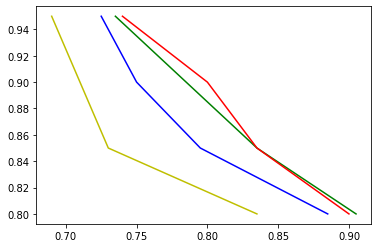

In [ ]:
 
alpha_Arr=[0.8,0.85,0.9,0.95]



Accuracy_80_50_50 = np.array(Accuracy_80_50_50)
Accuracy_85_50_50=np.array(Accuracy_85_50_50)
Accuracy_90_50_50=np.array(Accuracy_90_50_50)
Accuracy_95_50_50=np.array(Accuracy_95_50_50)

alpha_Arr = np.array(alpha_Arr)
plt.plot(Accuracy_80_50_50, alpha_Arr,'y')
plt.plot(Accuracy_85_50_50, alpha_Arr,'b')
plt.plot(Accuracy_90_50_50, alpha_Arr,'g')
plt.plot(Accuracy_95_50_50, alpha_Arr,'r')
plt.show()
  



# **Splitting 70/30**

In [ ]:
Test_set_Data_b = []
Training_set_Data_b =[]
Test_set_labels_b = []
Training_set_labels_b =[]

for i in range (40):
  for j in range(7):
    Training_set_Data_b.append(vector_x[i*10+j])
    Training_set_labels_b.append(vector_y[i*10+j])
  for p in range(3):
    Test_set_Data_b.append(vector_x[i*10+p+j])
    Test_set_labels_b.append(vector_y[i*10+p+j])

Test_set_Data_b=np.array(Test_set_Data_b)
Test_set_labels_b=np.array(Test_set_labels_b)

Training_set_Data_b=np.array(Training_set_Data_b)
Training_set_labels_b=np.array(Training_set_labels_b)

In [ ]:
Eigen_val_b, Eigen_vector_b = Eigen_Generator(Training_set_Data_b)
total_Eigen_vals_b = np.sum(abs(Eigen_val_b))
print(Eigen_val_b.shape)

(10304,)


In [ ]:
prj_train_95_b,prj_test_95_b = Projecting_Data(0.95,Eigen_val_b,Eigen_vector_b,Training_set_Data_b,Test_set_Data_b)
prj_train_90_b,prj_test_90_b = Projecting_Data(0.9,Eigen_val_b,Eigen_vector_b,Training_set_Data_b,Test_set_Data_b)
prj_train_85_b,prj_test_85_b = Projecting_Data(0.85,Eigen_val_b,Eigen_vector_b,Training_set_Data_b,Test_set_Data_b)
prj_train_80_b,prj_test_80_b = Projecting_Data(0.8,Eigen_val_b,Eigen_vector_b,Training_set_Data_b,Test_set_Data_b)

Reduced Dimensions: 137
Reduced Dimensions: 85
Reduced Dimensions: 55
Reduced Dimensions: 37


In [ ]:
Accuracy_80_70_30=[]
Accuracy_85_70_30=[]
Accuracy_90_70_30=[]
Accuracy_95_70_30=[]
Accuracy_95_70_30.append(Knn_Classifier_model(1,prj_train_95_b,Training_set_labels_b,prj_test_95_b,Test_set_labels_b,0.95))
Accuracy_95_70_30.append(Knn_Classifier_model(3,prj_train_95_b,Training_set_labels_b,prj_test_95_b,Test_set_labels_b,0.95))
Accuracy_95_70_30.append(Knn_Classifier_model(5,prj_train_95_b,Training_set_labels_b,prj_test_95_b,Test_set_labels_b,0.95))
Accuracy_95_70_30.append(Knn_Classifier_model(7,prj_train_95_b,Training_set_labels_b,prj_test_95_b,Test_set_labels_b,0.95))

Accuracy_90_70_30.append(Knn_Classifier_model(1,prj_train_90_b,Training_set_labels_b,prj_test_90_b,Test_set_labels_b,0.9))
Accuracy_90_70_30.append(Knn_Classifier_model(3,prj_train_90_b,Training_set_labels_b,prj_test_90_b,Test_set_labels_b,0.9))
Accuracy_90_70_30.append(Knn_Classifier_model(5,prj_train_90_b,Training_set_labels_b,prj_test_90_b,Test_set_labels_b,0.9))
Accuracy_90_70_30.append(Knn_Classifier_model(7,prj_train_90_b,Training_set_labels_b,prj_test_90_b,Test_set_labels_b,0.9))

Accuracy_85_70_30.append(Knn_Classifier_model(1,prj_train_85_b,Training_set_labels_b,prj_test_85_b,Test_set_labels_b,0.85))
Accuracy_85_70_30.append(Knn_Classifier_model(3,prj_train_85_b,Training_set_labels_b,prj_test_85_b,Test_set_labels_b,0.85))
Accuracy_85_70_30.append(Knn_Classifier_model(5,prj_train_85_b,Training_set_labels_b,prj_test_85_b,Test_set_labels_b,0.85))
Accuracy_85_70_30.append(Knn_Classifier_model(7,prj_train_85_b,Training_set_labels_b,prj_test_85_b,Test_set_labels_b,0.85))

Accuracy_80_70_30.append(Knn_Classifier_model(1,prj_train_80_b,Training_set_labels_b,prj_test_80_b,Test_set_labels_b,0.8))
Accuracy_80_70_30.append(Knn_Classifier_model(3,prj_train_80_b,Training_set_labels_b,prj_test_80_b,Test_set_labels_b,0.8))
Accuracy_80_70_30.append(Knn_Classifier_model(5,prj_train_80_b,Training_set_labels_b,prj_test_80_b,Test_set_labels_b,0.8))
Accuracy_80_70_30.append(Knn_Classifier_model(7,prj_train_80_b,Training_set_labels_b,prj_test_80_b,Test_set_labels_b,0.8))

### **Plot the accuracy against the alpha values**



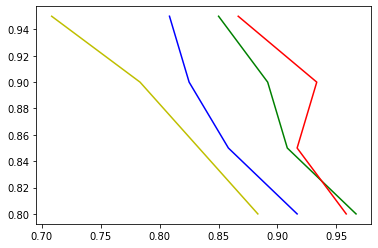

In [ ]:
alpha_Arr=[0.8,0.85,0.9,0.95]


Accuracy_80_70_30 = np.array(Accuracy_80_70_30)
Accuracy_85_70_30=np.array(Accuracy_85_70_30)
Accuracy_90_70_30=np.array(Accuracy_90_70_30)
Accuracy_95_70_30=np.array(Accuracy_95_70_30)

alpha_Arr = np.array(alpha_Arr)
plt.plot(Accuracy_80_70_30, alpha_Arr,'y')
plt.plot(Accuracy_85_70_30, alpha_Arr,'b')
plt.plot(Accuracy_90_70_30, alpha_Arr,'g')
plt.plot(Accuracy_95_70_30, alpha_Arr,'r')
plt.show()